## Regressão linear - preços de carros
***

**Fonte**: https://www.kaggle.com/hellbuoy/car-price-prediction?select=CarPrice_Assignment.csv  

O objetivo é criar um modelo de machine learning utilizando a técnica de **Regressão Linear**, que faça previsões sobre os preços de carros a partir das características apresentadas no dataset.

In [137]:
import pandas as pd

In [138]:
dados = pd.read_csv('CarPrice_Assignment.csv')
dados.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


As variáveis fueltype (tipo de combustível) e doornumber (número de portas) podem ter algum efeito em nosso modelo. Então, vou trocar a representação dos dados nessas variáveis.

In [139]:
dados.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

In [140]:
dados.fueltype = dados.fueltype.map({'gas' : 0, 'diesel': 1})


|fueltype||ID|
|---||---|
|gas||0|
|diesel||1|

In [141]:
dados.doornumber.unique()

array(['two', 'four'], dtype=object)

In [142]:
dados.doornumber = dados.doornumber.map({'two' : 0, 'four': 1})

|doornumber||ID|
|---||---|
|two||0|
|fuor||1|

#### Estatísticas descritivas e tabela de correlação

In [143]:
dados.describe()

,car_ID,symboling,fueltype,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,0.097561,0.560976,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,0.297446,0.497483,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,0.000000,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,0.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,0.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,0.000000,1.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,1.000000,1.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [144]:
dados.corr()

,car_ID,symboling,fueltype,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.125568,0.190352,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.194311,-0.664073,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
fueltype,0.125568,-0.194311,1.000000,0.191491,0.308346,0.212679,0.233880,0.284631,0.217275,0.069594,0.054451,0.241829,0.984356,-0.163926,-0.476883,0.255963,0.191392,0.105679
doornumber,0.190352,-0.664073,0.191491,1.000000,0.447357,0.398568,0.207168,0.552208,0.197379,0.020742,0.119258,-0.011082,0.177888,-0.126947,-0.247668,-0.012417,-0.036330,0.031835
wheelbase,0.129729,-0.531954,0.308346,0.447357,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.212679,0.398568,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.233880,0.207168,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.284631,0.552208,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.217275,0.197379,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.069594,0.020742,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145


Pela tabela podemos ver que fueltype (tipo de combustível) tem correlação de 0.1 com a variável preço e doornumber (número de portas) tem 0.03. As que possuem um nivel maior de correlação são:
- carlength (compriemnto do carro)
- carheight (altura do carro)
- curbweight (peso-meio-fio)
- enginesize (tamanho do motor)
- horsepower (cavalos) 

#### Selecionando e trocando nomes das variáveis

In [145]:
dados_carros = dados[['price', 'carlength', 'carheight', 'curbweight', 'enginesize', 'horsepower']]

In [146]:
dados_carros.columns = ['preco', 'comp_do_carro', 'alt_do_carro', 'peso_meio_fio', 'tam_do_motor', 'cavalos']
dados_carros.head()

,preco,comp_do_carro,alt_do_carro,peso_meio_fio,tam_do_motor,cavalos
0,13495.0,168.8,48.8,2548,130,111
1,16500.0,168.8,48.8,2548,130,111
2,16500.0,171.2,52.4,2823,152,154
3,13950.0,176.6,54.3,2337,109,102
4,17450.0,176.6,54.3,2824,136,115


### Análises gráficas

#### Box plot da variável *dependente* (y)

In [147]:
import seaborn as sns

<AxesSubplot:title={'left':'Variável y'}, xlabel='Preços'>

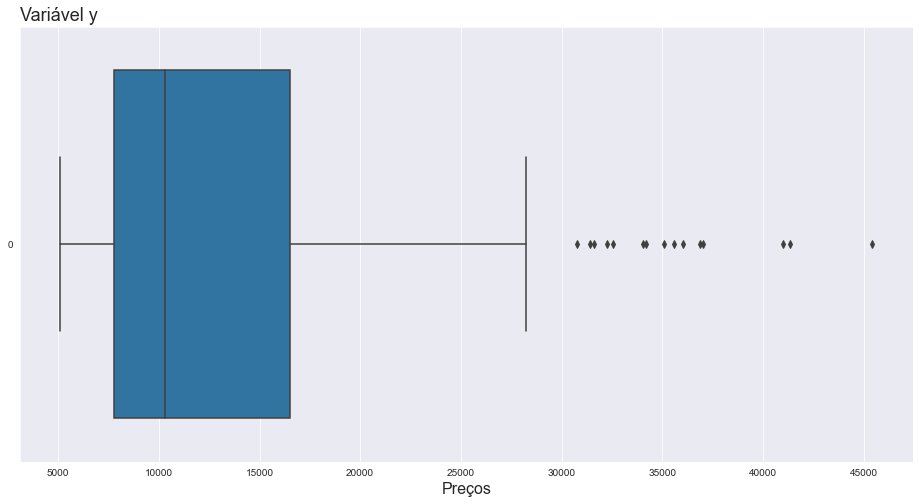

In [148]:
sns.set_style('darkgrid')
grafico = sns.boxplot(data = dados_carros.preco, orient = 'h')
grafico.figure.set_size_inches(16,8)
grafico.set_title('Variável y', fontsize = 18, loc = 'left')
grafico.set_xlabel('Preços', fontsize = 16)
grafico

C:\Users\felip\anaconda3\envs\felipe-pandas\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'left':'Distribuição variável preço'}, xlabel='Preços', ylabel='Density'>

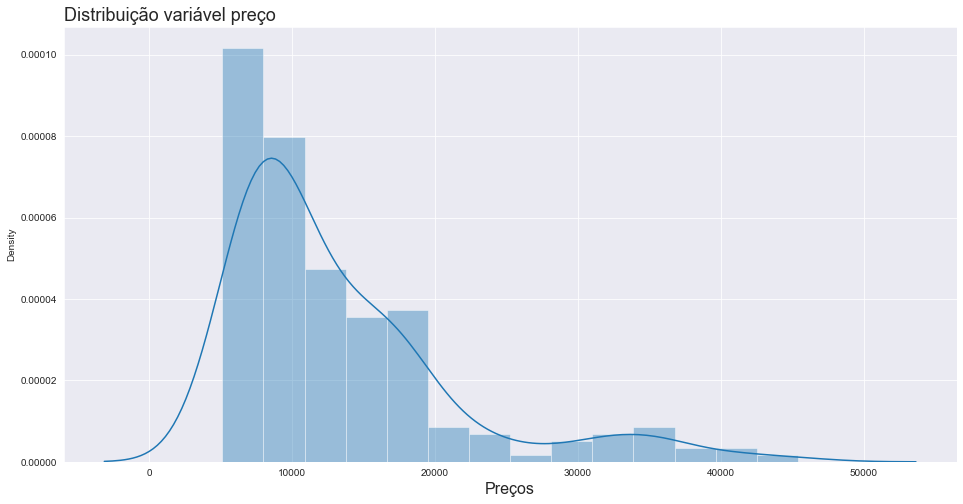

In [149]:
grafico = sns.distplot(dados_carros.preco)
grafico.figure.set_size_inches(16, 8)
grafico.set_title('Distribuição variável preço', fontsize = 18, loc = 'left')
grafico.set_xlabel('Preços', fontsize = 16)
grafico

Com o distplot, é possível perceber que a variável y possui uma distribuição assimétrica à direita.

### Gráficos de dispersão entre as variáveis

In [150]:
dados_carros.head(2)

,preco,comp_do_carro,alt_do_carro,peso_meio_fio,tam_do_motor,cavalos
0,13495.0,168.8,48.8,2548,130,111
1,16500.0,168.8,48.8,2548,130,111


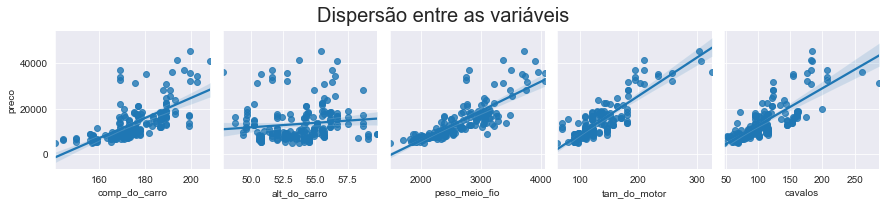

In [151]:
grafico = sns.pairplot(dados_carros, y_vars = 'preco',
                      x_vars = ['comp_do_carro', 'alt_do_carro', 'peso_meio_fio', 'tam_do_motor', 'cavalos'],
                      kind = 'reg')
grafico.fig.suptitle('Dispersão entre as variáveis', fontsize = 20, y = 1.1)
grafico

Os gráficos mostram que os preços dos carros aumentam conforme aumenta o valor das variáveis explicativas x.

## Aplicando a transformação logarítmica aos dados do *dataset*


In [152]:
import numpy as np

In [153]:
dados_carros['log_preco'] = np.log(dados_carros.preco)
dados_carros['log_comp_do_carro'] = np.log(dados_carros.comp_do_carro)
dados_carros['log_alt_do_carro'] = np.log(dados_carros.alt_do_carro)
dados_carros['log_peso_meio_fio'] = np.log(dados_carros.peso_meio_fio)
dados_carros['log_tam_do_motor'] = np.log(dados_carros.tam_do_motor)
dados_carros['log_cavalos'] = np.log(dados_carros.cavalos)

C:\Users\felip\anaconda3\envs\felipe-pandas\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [154]:
dados_carros.head()

,preco,comp_do_carro,alt_do_carro,peso_meio_fio,tam_do_motor,cavalos,log_preco,log_comp_do_carro,log_alt_do_carro,log_peso_meio_fio,log_tam_do_motor,log_cavalos
0,13495.0,168.8,48.8,2548,130,111,9.510075,5.128715,3.887730,7.843064,4.867534,4.709530
1,16500.0,168.8,48.8,2548,130,111,9.711116,5.128715,3.887730,7.843064,4.867534,4.709530
2,16500.0,171.2,52.4,2823,152,154,9.711116,5.142832,3.958907,7.945555,5.023881,5.036953
3,13950.0,176.6,54.3,2337,109,102,9.543235,5.173887,3.994524,7.756623,4.691348,4.624973
4,17450.0,176.6,54.3,2824,136,115,9.767095,5.173887,3.994524,7.945910,4.912655,4.744932


### Análises gráficas da variável dependente transformada

C:\Users\felip\anaconda3\envs\felipe-pandas\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'left':'Distribuição variável dependente transformada'}, xlabel='Preços', ylabel='Density'>

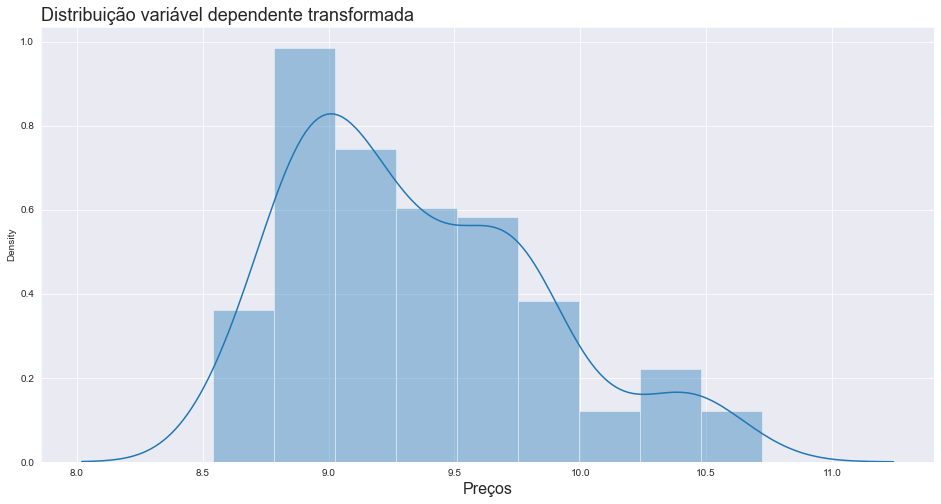

In [155]:
grafico = sns.distplot(dados_carros.log_preco)
grafico.figure.set_size_inches(16, 8)
grafico.set_title('Distribuição variável dependente transformada', fontsize = 18, loc = 'left')
grafico.set_xlabel('Preços', fontsize = 16)
grafico

### Gráficos de dispersão entre as variáveis transformadas

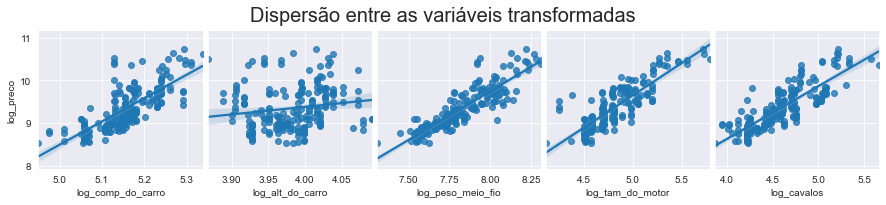

In [156]:
grafico = sns.pairplot(dados_carros, y_vars = 'log_preco',
                      x_vars = ['log_comp_do_carro', 'log_alt_do_carro', 'log_peso_meio_fio', 'log_tam_do_motor', 'log_cavalos'],
                      kind = 'reg')
grafico.fig.suptitle('Dispersão entre as variáveis transformadas', fontsize = 20, y = 1.1)
grafico

## Criando datasets de treino e teste

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [158]:
variavel_y = dados_carros['log_preco']
variaveis_x = dados_carros[['log_comp_do_carro', 'log_alt_do_carro', 'log_peso_meio_fio', 'log_tam_do_motor', 'log_cavalos']]

In [159]:
X_treino, X_teste, y_treino, y_teste = train_test_split(variaveis_x, variavel_y, test_size = 0.3, random_state = 2811)

### Importando biblioteca statsmodels e estimando modelo

In [160]:
import statsmodels.api as sm

In [161]:
X_treino_com_const = sm.add_constant(X_treino)

C:\Users\felip\anaconda3\envs\felipe-pandas\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [162]:
modelo_do_statsmodels = sm.OLS(y_treino, X_treino_com_const, hasconst = True).fit()

### Avaliando modelo

In [163]:
modelo_do_statsmodels.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_preco   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     140.0
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           4.89e-52
Time:                        16:40:54   Log-Likelihood:                 34.178
No. Observations:                 143   AIC:                            -56.36
Df Residuals:                     137   BIC:                            -38.58
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.2691      1.666     -2.562      0.011      -7.564      -0.974
log_comp_do_carro     0.3529      0.557      0.633      0.528      -0.749       1.455
log_alt_do_carro     -0.0194      0.492     -0.039      0.969      -0.992       0.953
log_peso_meio_fio     1.0953      0.269      4.066      0.000       0.563       1.628
log_tam_do_motor      0.2320      0.130      1.785      0.077      -0.025       0.489
log_cavalos           0.4754      0.102      4.657      0.000       0.274       0.677
==============================================================================
Omnibus:                        6.020   Durbin-Watson:                   1.791
Prob(Omnibus):                  0.049   Jarque-Bera (JB):                5.659
Skew:                           0.475   Prob(JB):                       0.0590
Kurtosis:                       3.214   Cond. No.                     1.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Aqui é possível perceber que o P>|t| (teste de significância individual dos parametros) de algumas variáveis está acima de 0.05 e esse valor pode gerar alguns problemas no modelo. Então deve ser feita a retirada dessas variáveis.

## Modificando o modelo

In [164]:
variaveis_x = dados_carros[['log_peso_meio_fio', 'log_tam_do_motor', 'log_cavalos']]

In [165]:
X_treino, X_teste, y_treino, y_teste = train_test_split(variaveis_x, variavel_y, test_size = 0.3, random_state = 2811)

In [166]:
X_treino_com_const = sm.add_constant(X_treino)
modelo_do_statsmodels = sm.OLS(y_treino, X_treino_com_const, hasconst = True).fit()

C:\Users\felip\anaconda3\envs\felipe-pandas\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [167]:
modelo_do_statsmodels.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_preco   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     235.8
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           2.59e-54
Time:                        16:40:55   Log-Likelihood:                 33.943
No. Observations:                 143   AIC:                            -59.89
Df Residuals:                     139   BIC:                            -48.03
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.5061      0.889     -3.945      0.000      -5.263      -1.749
log_peso_meio_fio     1.2289      0.173      7.102      0.000       0.887       1.571
log_tam_do_motor      0.2361      0.129      1.831      0.069      -0.019       0.491
log_cavalos           0.4566      0.085      5.359      0.000       0.288       0.625
==============================================================================
Omnibus:                        5.439   Durbin-Watson:                   1.784
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                5.119
Skew:                           0.458   Prob(JB):                       0.0773
Kurtosis:                       3.146   Cond. No.                         577.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Estimando modelo com os novos dados de treino

In [168]:
modelo = LinearRegression()

In [169]:
modelo.fit(X_treino, y_treino)

LinearRegression()

### Obtendo o coeficiente de determinação (R²)

In [170]:
print(f'R² = {modelo.score(X_treino, y_treino)}')

R² = 0.8357604990585582


O coeficiente de determinação mostra quanto a linha de regressão está ajustada aos dados e varia entre 1 e 0.
> 0.8357 é um valor muito bom.

### Obtendo o coeficiente de determinação (R²) das previsões

In [171]:
previsao = modelo.predict(X_teste)

#### Obtendo o coeficiente de determinação (R²) para as previsões

In [172]:
print(f'R² = {metrics.r2_score(y_teste, previsao)}')

R² = 0.8552535659154841


### Gerando previsões pontuais

Lembrando que os valores foram transformados com $log$, então será preciso aplicar $exp$ (exponencial).

In [173]:
entrada = X_teste[41:42]
entrada

,log_peso_meio_fio,log_tam_do_motor,log_cavalos
169,7.844241,4.983607,4.75359


In [174]:
modelo.predict(entrada)[0] #valor em log

9.481245280330358

In [175]:
np.exp(modelo.predict(entrada)[0]) #valor em exp

13111.503850083784

### Simulador simples

In [176]:
peso_meio_fio = 2000
tam_do_motor = 100
cavalos = 65
entrada = [[np.log(peso_meio_fio), np.log(tam_do_motor), np.log(cavalos)]]

In [177]:
print(f'R${np.exp(modelo.predict(entrada)[0]):.2f}')

R$6825.22


### Obtendo métricas do modelo

In [178]:
erro_quadratico_medio = metrics.mean_squared_error(y_teste, previsao).round(2)

In [179]:
raiz_do_erro = np.sqrt(erro_quadratico_medio).round(2)

In [180]:
coeficiente_de_determinacao = metrics.r2_score(y_teste, previsao).round(2)

In [181]:
pd.DataFrame([erro_quadratico_medio,
              raiz_do_erro,
              coeficiente_de_determinacao], 
             ['Erro quad. médio', 'Raiz do erro', 'R²'],
             columns = ['Métricas'])

,Métricas
Erro quad. médio,0.05
Raiz do erro,0.22
R²,0.86


### Coeficientes estimados

#### Intercepto

O intercepto é o **efeito médio** nos **preços dos carros** com todas as variáveis explicativas excluídas do modelo.

In [182]:
modelo.intercept_

-3.5060627301475638

In [183]:
np.exp(modelo.intercept_)

0.030014858693637594

#### Coeficientes de regressão

In [184]:
variaveis_x.columns

Index(['log_peso_meio_fio', 'log_tam_do_motor', 'log_cavalos'], dtype='object')

In [185]:
modelo.coef_

array([1.22894723, 0.23610517, 0.45660117])

#### Criando um DataFrame para armazenar os dados

In [186]:
index = ['Intercepto', 'Log Peso meio fio', 'Log Tamanho do motor', 'Log Cavalos']

In [187]:
pd.DataFrame(data = np.append(modelo.intercept_, modelo.coef_), index = index, columns = ['Parâmetros'])

,Parâmetros
Intercepto,-3.506063
Log Peso meio fio,1.228947
Log Tamanho do motor,0.236105
Log Cavalos,0.456601


### Interpretação dos coeficientes

**Intercepto**: se retirarmos o efeito das variáveis explicativas, o efeito médio no preço dos carros seria de R$0,03.  

**Peso meio fio**: mantendo o tamanho do motor e cavalos constantes, um acréssimo de 1% no peso meio fio de um carro gera, em média, um acrécimo de 1,22% no preço do carro.

**Tamanho do motor**: mantendo o peso meio fio e cavalos constantes, um acréssimo de 1% no tamanho do motor de um carro gera, em média, um acrécimo de 0,23% no preço do carro.

**Cavalos**: mantendo o tamanho do motor e peso meio fio constantes, um acréssimo de 1% no número de cavalos de um carro gera, em média, um acrécimo de 0,45% no preço do carro.

## Análises Gráficas dos resultados

In [188]:
y_previsto_treino = modelo.predict(X_treino)

### Gráfico de dispersão - Valor estimado X valor real

<AxesSubplot:title={'center':'Valor estimado X valor real'}, xlabel='log Preço - Previsão', ylabel='log Preço - Real'>

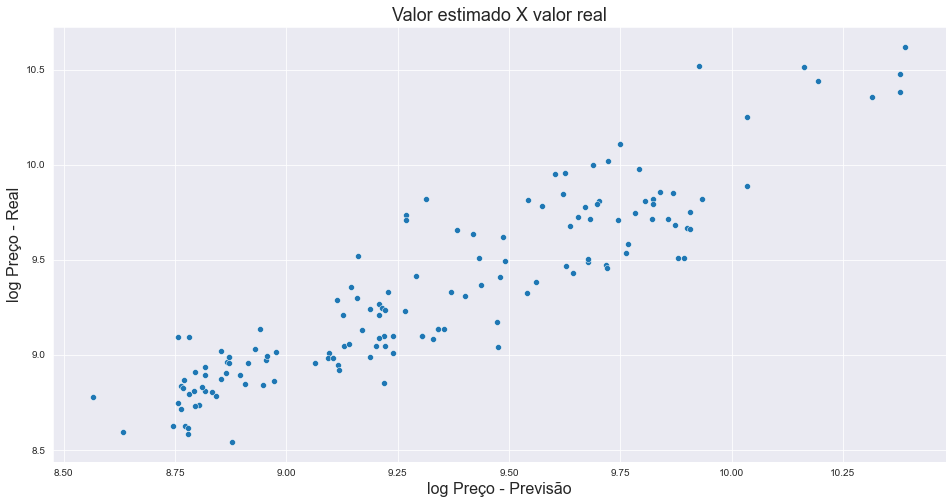

In [189]:
grafico = sns.scatterplot(x = y_previsto_treino, y = y_treino)
grafico.figure.set_size_inches(16, 8)
grafico.set_title('Valor estimado X valor real', fontsize = 18)
grafico.set_xlabel('log Preço - Previsão', fontsize = 16)
grafico.set_ylabel('log Preço - Real', fontsize = 16)
grafico

### Obtedo resíduos

In [190]:
residuo = y_treino - y_previsto_treino

C:\Users\felip\anaconda3\envs\felipe-pandas\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências dos Resíduos'}, xlabel='log Preço', ylabel='Density'>

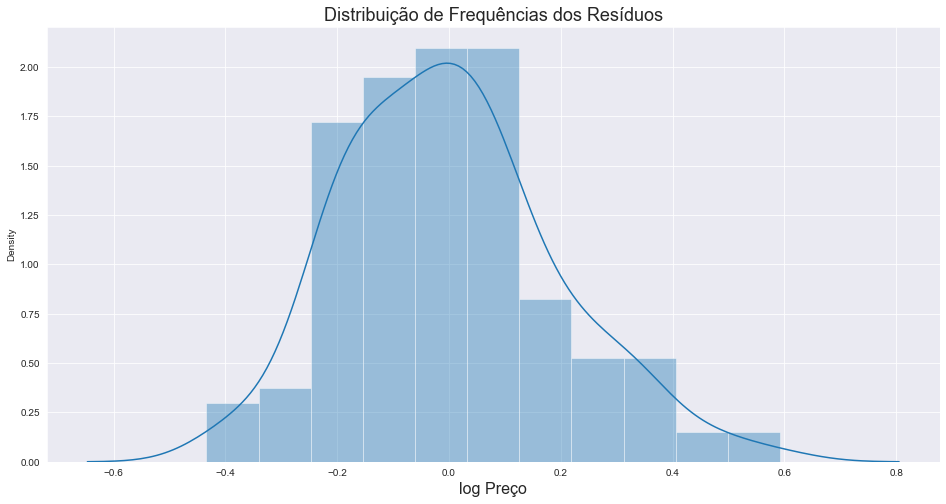

In [191]:
grafico = sns.distplot(residuo)
grafico.figure.set_size_inches(16, 8)
grafico.set_title('Distribuição de Frequências dos Resíduos', fontsize = 18)
grafico.set_xlabel('log Preço', fontsize = 16)
grafico

## Salvando e carregando o modelo estimado

In [192]:
import pickle

In [193]:
modelo_salvo = open('modelo_preco', 'wb')
pickle.dump(modelo, modelo_salvo)
modelo_salvo.close()